In [1]:
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
%matplotlib inline
from math import sqrt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
kings=pd.read_csv('Downloads/kings.csv')
kings


,obsno,age
0,1,60
1,2,43
2,3,67
3,4,50
4,5,56
5,6,42
6,7,50
7,8,65
8,9,68
9,10,43


In [3]:
kings.info() # 42 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   obsno   42 non-null     int64
 1   age     42 non-null     int64
dtypes: int64(2)
memory usage: 800.0 bytes


In [4]:
kings = kings.drop('obsno', axis=1)
kings.info()
kings.index #RangeIndex(start=0, stop=42, step=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     42 non-null     int64
dtypes: int64(1)
memory usage: 464.0 bytes


RangeIndex(start=0, stop=42, step=1)

Text(0.5, 1.0, 'data = kings')

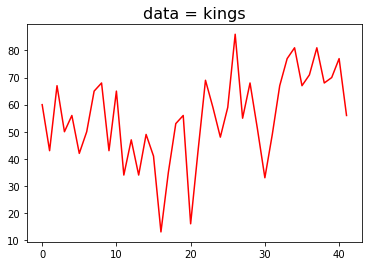

In [5]:
#lineplot
plt.plot(kings, color = 'r')
plt.title('data = kings', fontsize=16)


Text(0.5, 1.0, 'Histogram of kings Data')

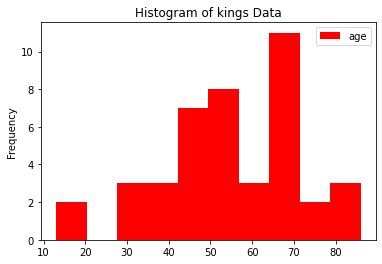

In [6]:
#Histogram
kings.plot(kind='hist', facecolor = 'r')
plt.title('Histogram of kings Data')


Text(0.5, 1.0, 'Density plot of kings Data')

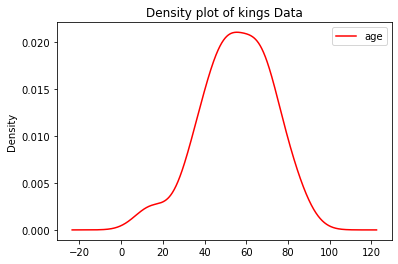

In [7]:
#Density plot
kings.plot(kind='kde', color = 'r')
plt.title('Density plot of kings Data')


Text(0.5, 1.0, 'Boxplot of kings Data')

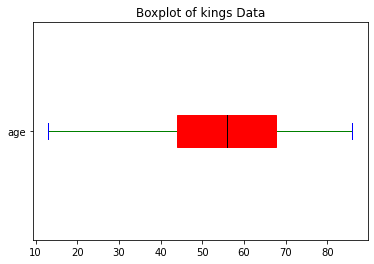

In [8]:
#Boxplot
props2 = dict(boxes = 'red', whiskers ='green', medians = 'black', caps = 'blue')
kings.plot.box(color = props2 , patch_artist = True, vert = False)
plt.title('Boxplot of kings Data')


In [9]:
#Decompose with multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
kings_decomp_m = seasonal_decompose(kings, period=1, model='mul') 
#Peroid is specified being the data is not having date as index


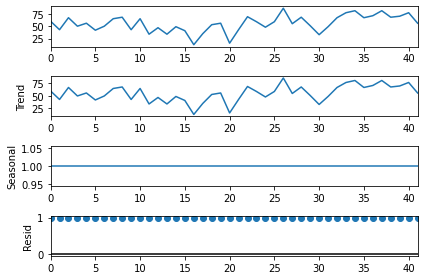

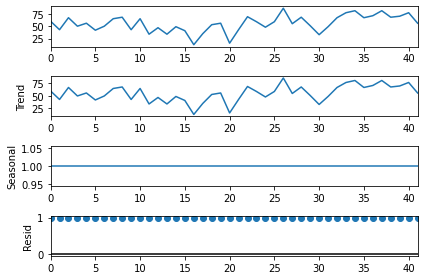

In [10]:
kings_decomp_m.plot() #No Trend & no seasonality; note 1

In [11]:
kings_decomp_m.observed
kings_decomp_m.trend
kings_decomp_m.seasonal
kings_decomp_m.resid

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
5     1.0
6     1.0
7     1.0
8     1.0
9     1.0
10    1.0
11    1.0
12    1.0
13    1.0
14    1.0
15    1.0
16    1.0
17    1.0
18    1.0
19    1.0
20    1.0
21    1.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.0
27    1.0
28    1.0
29    1.0
30    1.0
31    1.0
32    1.0
33    1.0
34    1.0
35    1.0
36    1.0
37    1.0
38    1.0
39    1.0
40    1.0
41    1.0
Name: resid, dtype: float64

In [12]:
#Decompose with Additive
from statsmodels.tsa.seasonal import seasonal_decompose
kings_decomp_add = seasonal_decompose(kings, period=1, model='add')


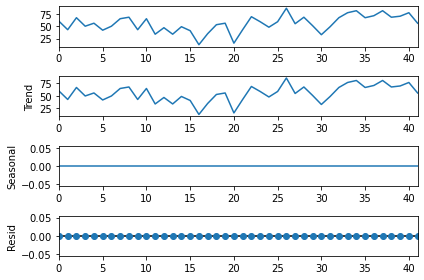

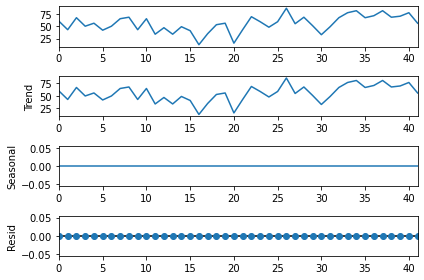

In [13]:
kings_decomp_add.plot() #No Trend & no seasonality


In [14]:
kings_decomp_add.observed
kings_decomp_add.trend
kings_decomp_add.seasonal
kings_decomp_add.resid


0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
14    0.0
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
Name: resid, dtype: float64

In [15]:
#Test for stationarity
from statsmodels.tsa.stattools import adfuller
kings_adf = adfuller(kings)
kings_adf

(-4.090229860104913,
 0.0010051728027032974,
 0,
 41,
 {'1%': -3.60098336718852,
  '5%': -2.9351348158036012,
  '10%': -2.6059629803688282},
 263.5882454953018)

In [16]:
print('ADF Statistic: %f' % kings_adf[0])
print('p-value: %f' % kings_adf[1])
print('Critical Values:')
for key, value in kings_adf[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.090230
p-value: 0.001005
Critical Values:
	1%: -3.601
	5%: -2.935
	10%: -2.606


In [17]:
#H0: Data is not stationary
#p-value: 0.001005 ie <= 0.05, Null Hypothesis rejected, so, the data is stationary


In [18]:
#Moving average/Rolloing average @3
kings_ma3 = kings.rolling(window=3).mean()
kings_ma3.head(10) # 1st & 2nd obs will be na

,age
0,NaN
1,NaN
2,56.666667
3,53.333333
4,57.666667
5,49.333333
6,49.333333
7,52.333333
8,61.000000
9,58.666667


Text(0.5, 1.0, 'data = kings')

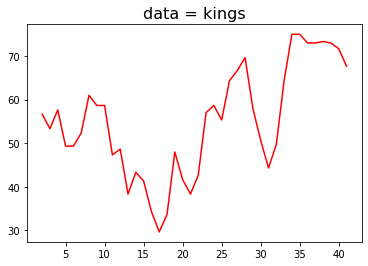

In [19]:
#lineplot
plt.plot(kings_ma3, 'r')
plt.title('data = kings', fontsize=16)

In [20]:
#Residuals / errors
kings_ma3_res = kings - kings_ma3
kings_ma3_res.head()
kings_ma3_res = kings_ma3_res.dropna()
kings_ma3_res.head()

,age
2,10.333333
3,-3.333333
4,-1.666667
5,-7.333333
6,0.666667


Text(0.5, 1.0, 'Histogram Residuals @MA3')

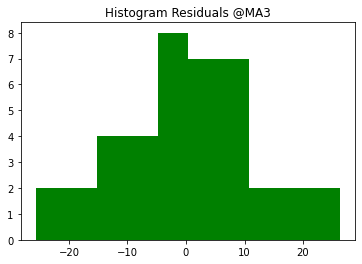

In [21]:
#Plotting histogram for residuals
plt.hist(kings_ma3_res, facecolor = 'g')
plt.title('Histogram Residuals @MA3')

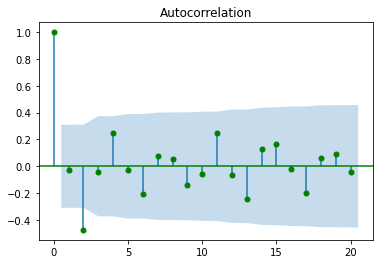

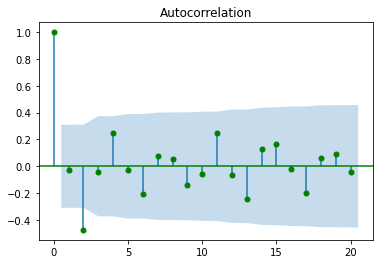

In [22]:
#Plotting acf
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(kings_ma3_res, lags=20, color ='g')


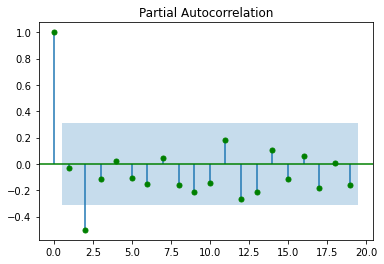

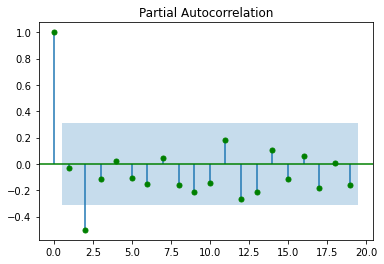

In [23]:
#Plotting pacf
from statsmodels.graphics.tsaplots import plot_pacf 
plot_pacf(kings_ma3_res, lags=19, color = 'g')


In [24]:
#______________________________RMSE
#Squaring residuals/ errors
kings_ma3_se = pow(kings_ma3_res,2)
kings_ma3_se.head()

,age
2,106.777778
3,11.111111
4,2.777778
5,53.777778
6,0.444444


In [25]:
#Dropping na's ie the fist row
#kings_ma3_se = kings_ma3_se.dropna()
#len(kings_ma3_se) #40

In [26]:
#average/mean of squared residuals/ errors
kings_ma3_mse = (kings_ma3_se.sum())/len(kings_ma3_se)
print(kings_ma3_mse) #128.7527777777778

age    128.752778
dtype: float64


In [27]:
#Root of average/mean of squared residuals/ errors
kings_ma3_rmse = sqrt(kings_ma3_mse) 
print(kings_ma3_rmse) #11.346928120763689

11.346928120763689


In [28]:
#______________RMSE
kings_ma3 = kings.rolling(window=3).mean()
kings_ma3 = kings_ma3.dropna()
ma3_rmse = sqrt(mean_squared_error(kings[2:],kings_ma3))
print(ma3_rmse) #11.346928120763689

11.346928120763689


In [29]:
#____________________________________Moving average/Rolloing average @8
kings_ma8 = kings.rolling(window=8).mean()
print(kings_ma8) # First 7 obs will be na


       age
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7   54.125
8   55.125
9   55.125
10  54.875
11  52.875
12  51.750
13  50.750
14  50.625
15  47.625
16  40.750
17  39.750
18  38.250
19  41.000
20  37.125
21  38.250
22  40.750
23  43.000
24  47.375
25  50.375
26  54.500
27  54.375
28  60.875
29  61.875
30  57.375
31  56.125
32  58.500
33  60.750
34  60.125
35  61.625
36  62.000
37  65.750
38  70.125
39  72.750
40  74.000
41  71.375


Text(0.5, 1.0, 'data = kings')

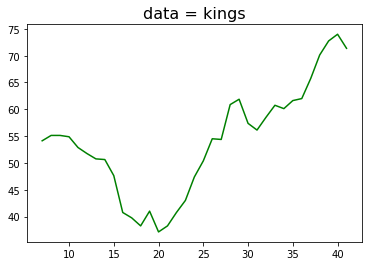

In [30]:
#lineplot
plt.plot(kings_ma8, 'g')
plt.title('data = kings', fontsize=16)


In [31]:
#Residuals / errors
kings_ma8_res = kings - kings_ma8
kings_ma8_res.head(10)
kings_ma8_res = kings_ma8_res.dropna() 
kings_ma8_res.head()

,age
7,10.875
8,12.875
9,-12.125
10,10.125
11,-18.875


Text(0.5, 1.0, 'Histogram Residuals @MA8')

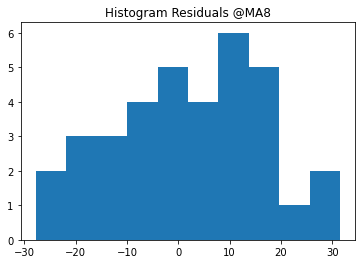

In [32]:
#Plotting histogram for residuals
plt.hist(kings_ma8_res)
plt.title('Histogram Residuals @MA8')


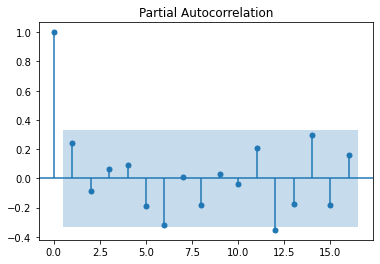

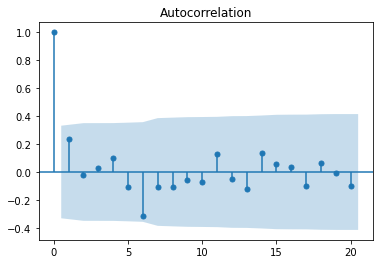

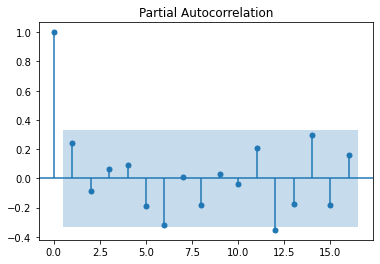

In [33]:
#Plotting acf & pacf 
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plot_acf(kings_ma8_res, lags=20) 
plot_pacf(kings_ma8_res, lags=16)

In [34]:
#Squaring residuals/ errors
kings_ma8_se = pow(kings_ma8_res,2)
kings_ma8_se.head(10)

,age
7,118.265625
8,165.765625
9,147.015625
10,102.515625
11,356.265625
12,22.562500
13,280.562500
14,2.640625
15,43.890625
16,770.062500


In [35]:
#Dropping na's ie the fist row
kings_ma8_se = kings_ma8_se.dropna()
len(kings_ma8_se) #35

35

In [36]:
#average/mean of squared residuals/ errors
kings_ma8_mse = (kings_ma8_se.sum())/len(kings_ma8_se)
print(kings_ma3_mse) #128.752778

age    128.752778
dtype: float64


In [37]:
#Root of average/mean of squared residuals/ errors
kings_ma8_rmse = sqrt(kings_ma8_mse) 
print(kings_ma8_rmse) #14.393373351253397


14.393373351253397


In [38]:
#Another method to find RMSE
kings_ma8 = kings.rolling(window=8).mean()
kings_ma8 = kings_ma8.dropna()
ma8_rmse = sqrt(mean_squared_error(kings[7:],kings_ma8))
print(ma8_rmse) #14.393373351253397

14.393373351253397


In [39]:
#_______________________Predicting with Moving average using Arima 
from statsmodels.tsa.arima.model import ARIMA
kings_ma_model = ARIMA(kings, order=(0,0,3)).fit()
kings_ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    age   No. Observations:                   42
Model:                 ARIMA(0, 0, 3)   Log Likelihood                -173.643
Date:                Sun, 05 Sep 2021   AIC                            357.286
Time:                        12:52:04   BIC                            365.974
Sample:                             0   HQIC                           360.470
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.3010      4.155     13.310      0.000      47.158      63.444
ma.L1          0.3525      0.256      1.375      0.169      -0.150       0.855
ma.L2          0.1218      0.197      0.617      0.537      -0.265       0.509
ma.L3          0.0434      0.194      0.224      0.823      -0.336       0.423
sigma2       227.6143     58.406      3.897      0.000     113.140     342.089
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.69
Prob(Q):                              0.90   Prob(JB):                         0.26
Heteroskedasticity (H):               1.03   Skew:                            -0.61
Prob(H) (two-sided):                  0.96   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
#SARIMAX = Seasonal Auto Regressive Integrated Moving Average with Exogeneous Regressors

In [41]:
#Prediction
kings_ma_pred = kings_ma_model.forecast(10)
type(kings_ma_pred)

pandas.core.series.Series

In [42]:
#Converting series to data frame
kings_ma_pred = pd.DataFrame(kings_ma_pred)
kings_ma_pred


,predicted_mean
42,55.451151
43,55.219174
44,55.014224
45,55.301029
46,55.301029
47,55.301029
48,55.301029
49,55.301029
50,55.301029
51,55.301029


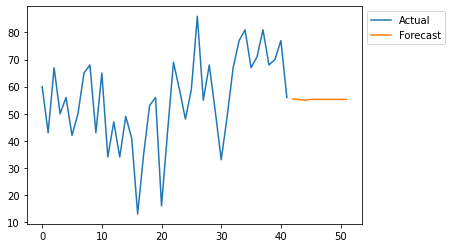

In [43]:
#Plot
plt.plot(kings)
plt.plot(kings_ma_pred)
plt.legend(['Actual','Forecast'], bbox_to_anchor=(1, 1), loc=2)
plt.show()


In [44]:
#Applying autoarima
#!pip install pmdarima


In [45]:
!pip install --user pmdarima

In [46]:
from pmdarima import auto_arima
model_autoarima = auto_arima(kings) 
model_autoarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   42
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -170.064
Date:                Sun, 05 Sep 2021   AIC                            344.127
Time:                        12:52:22   BIC                            347.554
Sample:                             0   HQIC                           345.375
                                 - 42                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7218      0.146     -4.957      0.000      -1.007      -0.436
sigma2       230.4371     57.900      3.980      0.000     116.956     343.919
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.73   Prob(JB):                         0.83
Heteroskedasticity (H):               1.15   Skew:                            -0.15
Prob(H) (two-sided):                  0.80   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
#Prediction
kings_pred = model_autoarima.predict(n_periods=10)
kings_pred
#kings_pred = pd.DataFrame(kings_pred); need to put index
kings_pred = pd.DataFrame(kings_pred, index=(np.arange(41,51,1)))
#Plot

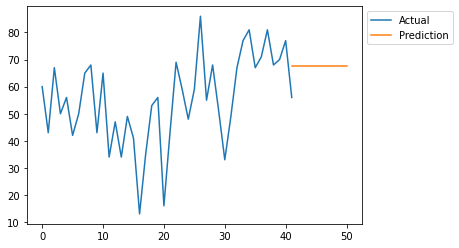

In [48]:
plt.plot(kings)
plt.plot(kings_pred)
plt.legend(['Actual','Prediction'], bbox_to_anchor=(1, 1))
plt.show()